# MORE THAN ONE VARIABLE IN ONE MODEL -  POLINOMIAL Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

In [2]:
dfcars = pd.read_csv("..\\data\\auto\\auto-mpg.csv")
dfcars.dropna(axis=0, inplace=True)
dfcars=dfcars[dfcars['horsepower']!='?']
dfcars['horsepower']=dfcars['horsepower'].astype('float')
dfcars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


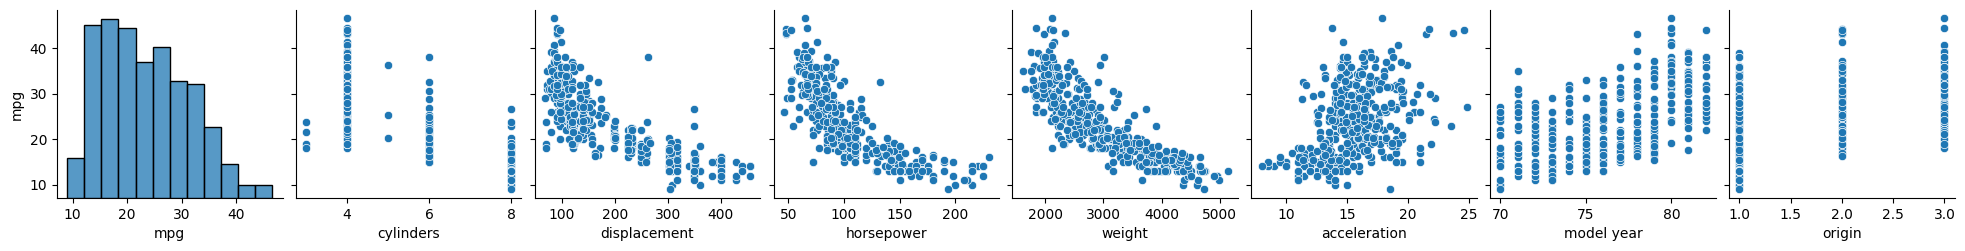

In [3]:
sns.pairplot(dfcars, y_vars='mpg')

In [5]:
import statsmodels.api as sm

x = dfcars.horsepower
y = dfcars.mpg
X = sm.add_constant(x)
regr = sm.OLS(y,X)
results= regr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           7.03e-81
Time:                        23:24:10   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

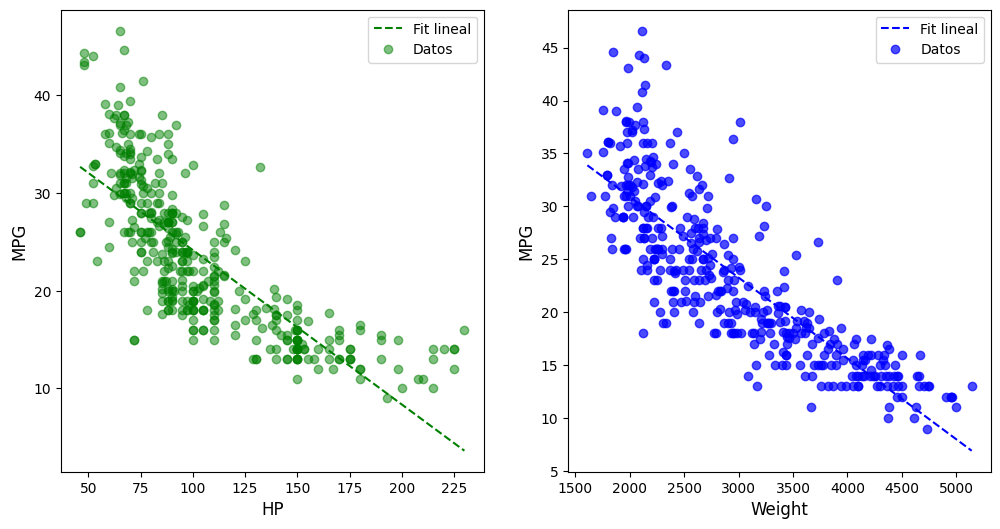

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

grid = np.linspace(np.min(dfcars.horsepower), np.max(dfcars.horsepower), 100)
y_fit=results.predict(sm.add_constant(grid))

ax[0].plot(grid,y_fit, '--',color='g',label='Fit lineal')
ax[0].plot(dfcars.horsepower,dfcars.mpg, 'o',color='g',alpha=0.5,label='Datos')
ax[0].set_xlabel("HP", fontsize=12)
ax[0].set_ylabel("MPG", fontsize=12)
ax[0].legend()

x2 = dfcars.weight
X2 = sm.add_constant(x2)

regr2 = sm.OLS(y, X2)
res2 = regr2.fit()
grid2 = np.linspace(np.min(dfcars.weight), np.max(dfcars.weight), 100)

y_fit2=res2.predict(sm.add_constant(grid2))

ax[1].plot(grid2,y_fit2, '--',color='b',label='Fit lineal')

ax[1].plot(dfcars.weight,dfcars.mpg, 'o',color='b',alpha=0.7,label='Datos')

ax[1].set_xlabel("Weight", fontsize=12)
ax[1].set_ylabel("MPG", fontsize=12)
ax[1].legend()

In [12]:
from statsmodels.tools import eval_measures

y_pred = results.predict(X)
rmse=eval_measures.rmse(y,y_pred)
print('Root Mean Squared Error (RMSE) from HP',rmse)

y_pred2=res2.predict(X2)
rmse2=eval_measures.rmse(y,y_pred2)
print('Root Mean Squared Error (RMSE) from Weight', rmse2)

Root Mean Squared Error (RMSE) from HP 4.893226230065713
Root Mean Squared Error (RMSE) from Weight 4.321645126270701


# Polinomial

In [14]:
import statsmodels.api as sm

dfcars['wt2']=dfcars['weight']**2

xp=dfcars[['weight','wt2']]
Xp = sm.add_constant(xp)

polyreg=sm.OLS(y,Xp).fit()

print(polyreg.params, polyreg.rsquared)
polyreg.summary()

const     62.255474
weight    -0.018496
wt2        0.000002
dtype: float64 0.7151475557845139


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     488.3
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          8.39e-107
Time:                        01:41:23   Log-Likelihood:                -1115.1
No. Observations:                 392   AIC:                             2236.
Df Residuals:                     389   BIC:                             2248.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.2555      2.993     20.800      0.000      56.371      68.140
weight        -0.0185      0.002     -9.379      0.000      -0.022      -0.015
wt2         1.697e-06   3.06e-07      5.545      0.000     1.1e-06     2.3e-06
==============================================================================
Omnibus:                       53.804   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.923
Skew:                           0.809   Prob(JB):                     4.03e-21
Kurtosis:                       4.770   Cond. No.                     1.57e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

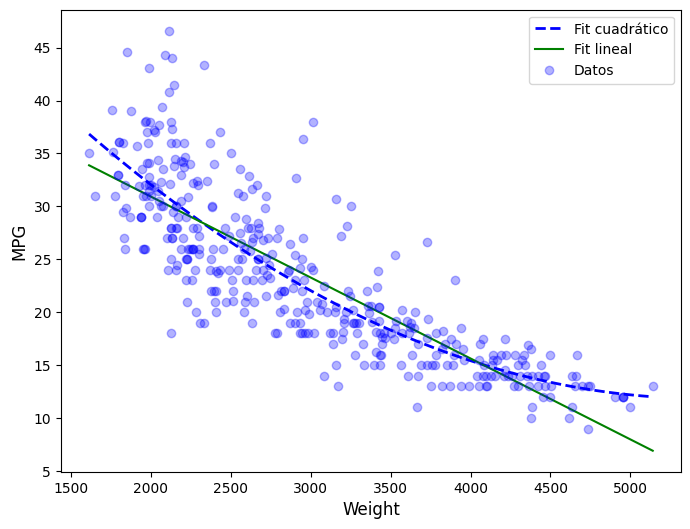

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

gridp = np.linspace(np.min(dfcars.weight), np.max(dfcars.weight), 100)

y_fit_poly=polyreg.params[0]+polyreg.params[1]*gridp+polyreg.params[2]*gridp**2

#plots
ax.plot(gridp,y_fit_poly, '--',color='b',label='Fit cuadrático',lw=2) #modelo polinomial

ax.plot(grid2,y_fit2, '-',color='green',label='Fit lineal') #modelo lineal obtenido arriba

ax.plot(dfcars.weight,dfcars.mpg, 'o',color='b',alpha=0.3,label='Datos')

ax.set_xlabel("Weight", fontsize=12)
ax.set_ylabel("MPG", fontsize=12)
ax.legend()

In [16]:
#lineal con x=horsepower
y_pred=results.predict(X)
rmse= eval_measures.rmse(y,y_pred)
print('Error cuadrático medio (hp):',rmse)

#lineal con x=weight
y_pred2=res2.predict(X2)
rmse2= eval_measures.rmse(y,y_pred2)
print('Error cuadrático medio (weight):',rmse2)

#polinomial con x=[weight,weight^2]
y_pred_poly=polyreg.predict(Xp)
rmse_poly= eval_measures.rmse(y,y_pred_poly)
print('Error cuadrático medio (weight,weight^2):',rmse_poly)

Error cuadrático medio (hp): 4.893226230065713
Error cuadrático medio (weight): 4.321645126270701
Error cuadrático medio (weight,weight^2): 4.160338275010808


# Multilineal Regresion

In [18]:
def build_matrix(df, columns, cols_squared=[]):
    x_matrix = df[columns].copy()

    for col in cols_squared:
        x_matrix['%s_2'%col] = df[col]**2

    x_matrix = sm.add_constant(x_matrix)
    return(x_matrix)

In [19]:
columns=['displacement','horsepower','weight']
cols_squared=['weight']

X_multi=build_matrix(dfcars, columns,cols_squared)
X_multi.head()

,const,displacement,horsepower,weight,weight_2
0,1.0,307.0,130.0,3504,12278016
1,1.0,350.0,165.0,3693,13638249
2,1.0,318.0,150.0,3436,11806096
3,1.0,304.0,150.0,3433,11785489
4,1.0,302.0,140.0,3449,11895601


In [20]:
y = dfcars.mpg
multireg= sm.OLS(y, X_multi, hasconst=True).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.39e-111
Time:                        08:49:48   Log-Likelihood:                -1099.0
No. Observations:                 392   AIC:                             2208.
Df Residuals:                     387   BIC:                             2228.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           63.9161      3.054     20.929      0.000      57.912      69.920
displacement    -0.0046      0.006     -0.732      0.465      -0.017       0.008
horsepower      -0.0566      0.012     -4.583      0.000      -0.081      -0.032
weight          -0.0178      0.002     -9.029      0.000      -0.022      -0.014
weight_2      2.017e-06      3e-07      6.721      0.000    1.43e-06    2.61e-06
==============================================================================
Omnibus:                       45.681   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.077
Skew:                           0.736   Prob(JB):                     1.35e-16
Kurtosis:                       4.519   Cond. No.                     1.66e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#lineal con x=horsepower
y_pred=results.predict(X)
rmse= eval_measures.rmse(y,y_pred)
print('Error cuadrático medio (hp):',rmse)

#lineal con x=weight
y_pred2=res2.predict(X2)
rmse2= eval_measures.rmse(y,y_pred2)
print('Error cuadrático medio (weight):',rmse2)

#polinomial con x=[weight,weight^2]
y_pred_poly=polyreg.predict(Xp)
rmse_poly= eval_measures.rmse(y,y_pred_poly)
print('Error cuadrático medio (weight,weight^2):',rmse_poly)

#multilineal con x=[disp,hp,weight,weight^2]
y_pred_multi=multireg.predict(X_multi)
rmse_multi= eval_measures.rmse(y,y_pred_multi)
print('Error cuadrático medio (disp,hp,weight,weight^2):',rmse_multi)


Error cuadrático medio (hp): 4.893226230065713
Error cuadrático medio (weight): 4.321645126270701
Error cuadrático medio (weight,weight^2): 4.160338275010808
Error cuadrático medio (disp,hp,weight,weight^2): 3.9931254670276024


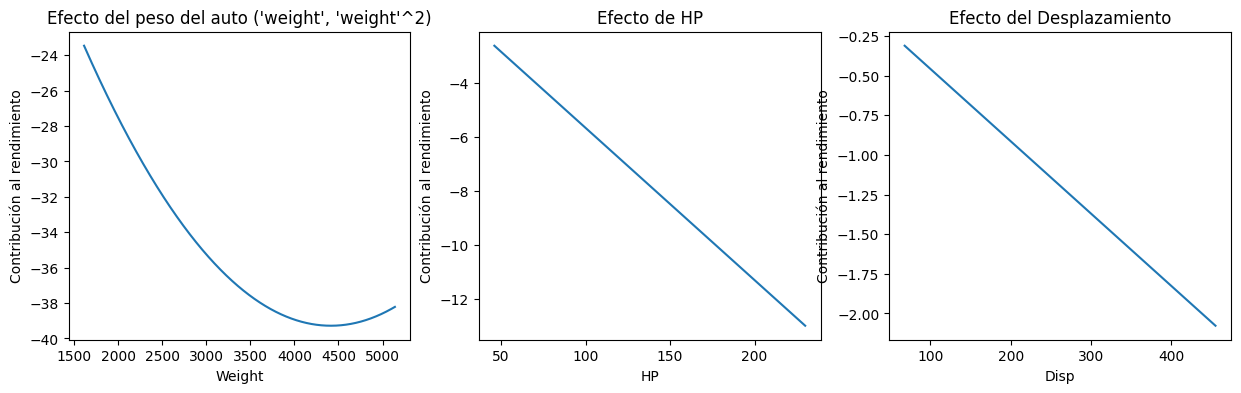

In [22]:
fig=plt.figure(figsize=(15,4))

x_wt = np.arange(dfcars['weight'].min(),dfcars['weight'].max(),0.01)
wtcoef = multireg.params.weight
wt2coef = multireg.params.weight_2
y_wt = wtcoef*x_wt +wt2coef*x_wt**2

ax1=fig.add_subplot(131)
ax1.plot(x_wt, y_wt)
ax1.set_title("Efecto del peso del auto ('weight', 'weight'^2)")
ax1.set_xlabel("Weight")
ax1.set_ylabel("Contribución al rendimiento")

hpcoef=multireg.params.horsepower
x_hp = np.arange(dfcars['horsepower'].min(),dfcars['horsepower'].max(),0.01)
y_hp=hpcoef*x_hp

ax2=fig.add_subplot(132)
ax2.plot(x_hp, y_hp)
ax2.set_title("Efecto de HP")
ax2.set_xlabel("HP")
ax2.set_ylabel("Contribución al rendimiento")

dispcoef=multireg.params.displacement
x_disp = np.arange(dfcars['displacement'].min(),dfcars['displacement'].max(),0.01)
y_disp=dispcoef*x_disp

ax3=fig.add_subplot(133)
ax3.plot(x_disp, y_disp)
ax3.set_title("Efecto del Desplazamiento")
ax3.set_xlabel("Disp")
ax3.set_ylabel("Contribución al rendimiento")

plt.show()
